# A Decision Tree on the California Housing dataset

## 🔹 Step 1: Load the dataset

In [1]:
from sklearn.datasets import fetch_california_housing
import pandas as pd

housing = fetch_california_housing()
X = pd.DataFrame(housing.data, columns=housing.feature_names)
y = housing.target

In [2]:
X.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


## 🔹 Step 2: Split the data

In [3]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## 🔹 Step 3: Train a decision tree


In [4]:
from sklearn.tree import DecisionTreeRegressor

# Initialize the model
model = DecisionTreeRegressor(random_state=42)  # depth=3 keeps it simple

# Train the model
model.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

#### To find the optimal *depth*, use **cross-validation** or a **validation set**.

## 🔹 Step 4: Make predictions

In [5]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Make predictions
y_pred = model.predict(X_test)

# Calculate MSE, RMSE and the coefficient of determination (R^2)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R^2 Score: {r2:.2f}")

MSE: 0.50
RMSE: 0.70
R^2 Score: 0.62


**Mean Squared Error (MSE: 0.50)**
- **Interpretation:** MSE quantifies the average squared difference between the actual house values and the predicted house values. The lower the MSE, the better the model is at predicting the house values.

- **MSE of 0.50:** This value suggests that on average, the squared prediction error is 0.50. While this is not overly high, it indicates that there is still a significant difference between the predicted values and the actual values. The model might be underfitting certain segments of the data, or there could be high variance in certain areas.


**R² Score (R² = 0.62)**
- **Interpretation:** The R² score, or the coefficient of determination, explains the proportion of the variance in the dependent variable (house values) that is predictable from the independent variables (features).
- **R² of 0.62:** An R² score of 0.62 suggests that 62% of the variance in the house values is explained by the model. This is a moderately good fit, meaning the model is capturing a decent portion of the variance in the data but not all of it. There is still room for improvement, possibly by fine-tuning the model, adding new features, or trying different models like Random Forest or Gradient Boosting.

## 🔹 Step 5: Visualize predictions

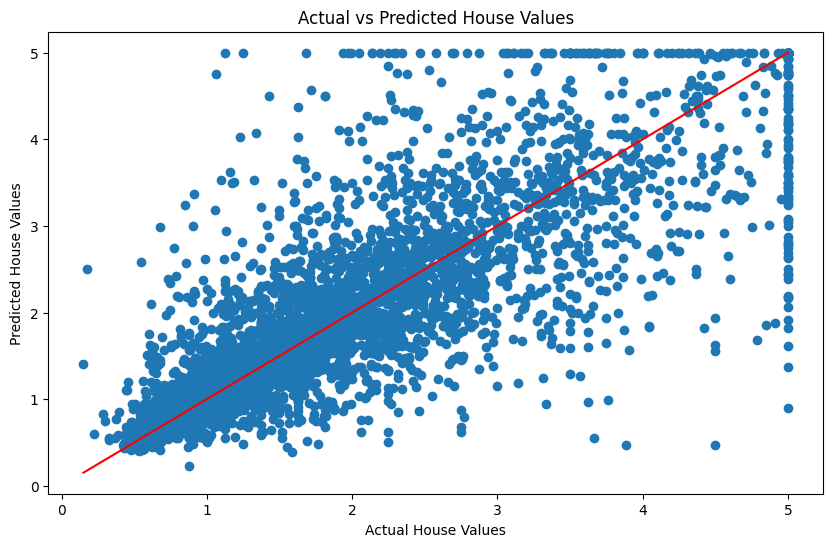

In [6]:
import matplotlib.pyplot as plt

# Plotting actual vs predicted prices
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')  # Line showing perfect predictions
plt.xlabel('Actual House Values')
plt.ylabel('Predicted House Values')
plt.title('Actual vs Predicted House Values')
plt.show()

**Insights from the Scatter Plot:**
- **Spread of Data:** The scatter plot shows that for lower actual house values (around 1-2), the model is generally doing well. However, as the actual house values increase, the predictions start to deviate more, with a wider spread away from the line of perfect prediction.
- **Capped Data at 5:** It is clear from the clustering around the 5 on the x-axis and y-axis that the data might be capped at 5, which is likely influencing the model's ability to predict values above this threshold. This could suggest that house values are not represented well in the higher range, and the model might need to be adjusted to better handle this cap.

## 🔹 Step 6: Display the feature importance from the decision tree model

In [7]:
import pandas as pd

feature_importance = pd.DataFrame(model.feature_importances_, index=X.columns, columns=['Importance'])
feature_importance.sort_values(by='Importance', ascending=False, inplace=True)
print(feature_importance)

            Importance
MedInc        0.528509
AveOccup      0.130838
Latitude      0.093717
Longitude     0.082902
AveRooms      0.052975
HouseAge      0.051884
Population    0.030516
AveBedrms     0.028660


### Feature Importance:

By examining the feature importance values, we gain insights into which features have the most influence on house prices in California. This analysis can guide feature selection and further model refinement in future iterations of the project.

##🔹 Step 7: Visualize the tree

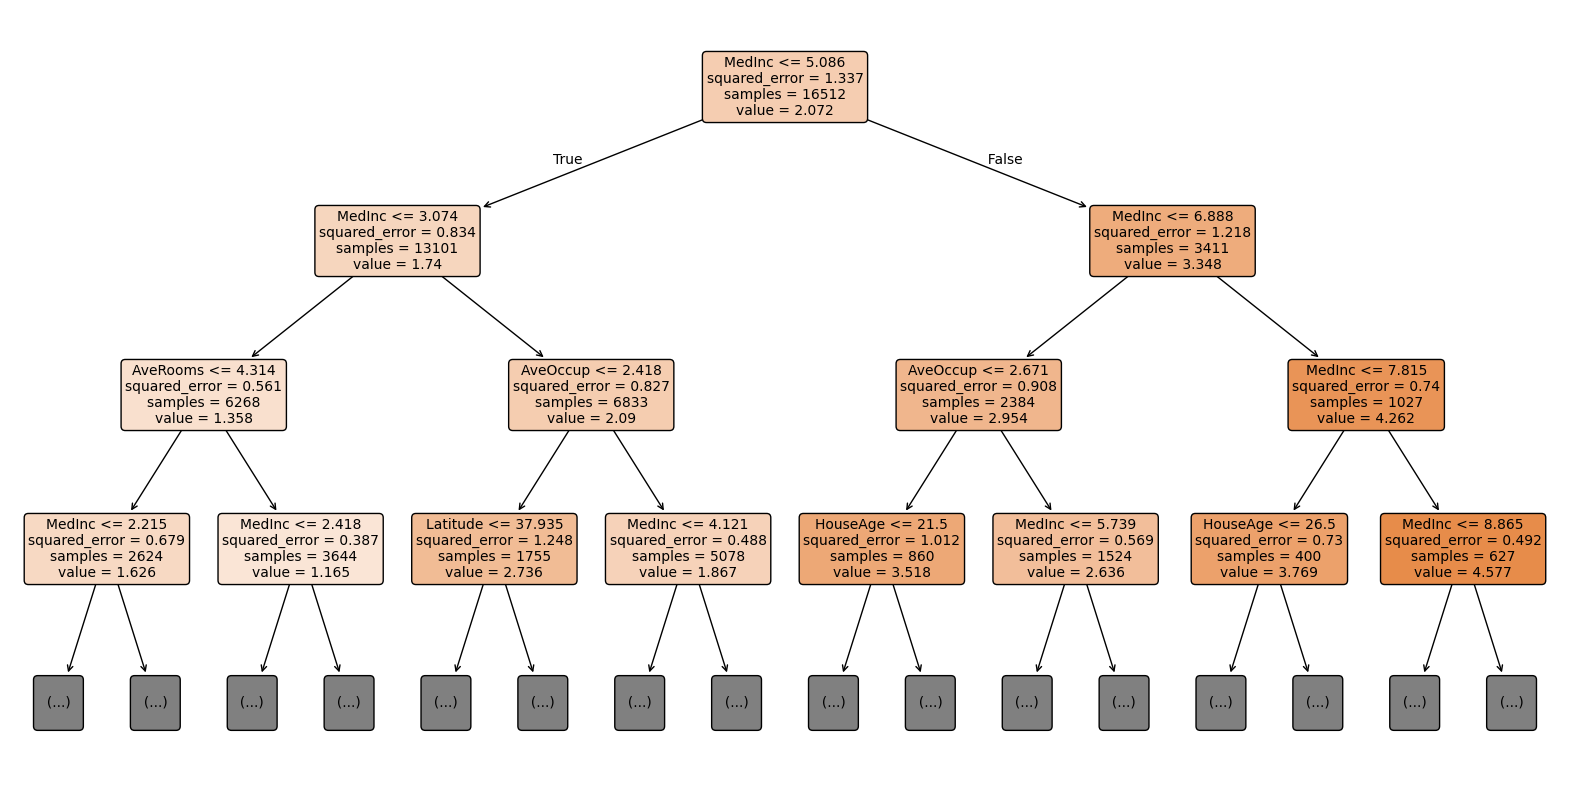

In [8]:
from sklearn.tree import plot_tree

plt.figure(figsize=(20, 10))
plot_tree(model, feature_names=X.columns, filled=True, rounded=True, fontsize=10, max_depth=3)
plt.show()

### Decision Tree Visualization

The plotted decision tree shows how the decision tree regressor splits the data at various decision nodes to make predictions about the target variable, which is the median house value (`MedHouseVal`). Each node in the tree represents a decision based on one of the input features. Here's how to interpret this plot:

### Key Components of Each Node:
1. **Feature and Threshold**:
   - Each node specifies a feature and a threshold value. For example, the root node splits based on the feature `MedInc` (Median Income) at a threshold of `<= 5.086`.
   - This means that the dataset is split into two subsets: one where `MedInc` is less than or equal to 5.086, and another where `MedInc` is greater than 5.086.

2. **Squared Error**:
   - This is the residual sum of squares for the samples in that node. The lower the squared error, the better the node fits the data.

3. **Samples**:
   - This indicates how many samples (data points) fall into each node or branch. For example, in the root node, there are 16,512 samples.

4. **Value**:
   - This is the predicted value for the median house value at each node. For example, at the root node, the average predicted house value is approximately `2.072` (in hundreds of thousands of dollars, i.e., around $207,200).

### Interpreting the Tree Structure:
- **Root Node (Top Node)**:
   - The first split is made based on `MedInc <= 5.086`. This indicates that median income is the most important feature for predicting house values in the dataset. The tree continues to split the data into smaller subsets based on this feature, refining its predictions.

- **Left Subtree**:
   - The left child of the root node splits on `MedInc <= 3.074`. This subtree contains houses with lower median income, and further splits are based on features like `AveRooms` (average number of rooms) and `MedInc` at different thresholds.
   - As you move down the left subtree, you can observe how the model predicts lower house values (closer to 1.358 or 1.626).

- **Right Subtree**:
   - The right child of the root node contains data where `MedInc > 5.086`, typically associated with higher house prices. As the tree splits further, features like `AveOccup` (average occupants per household), `MedInc`, and `HouseAge` (age of the houses) are used to make finer predictions.
   - The predicted values in this part of the tree tend to be higher, reflecting the higher median incomes.

### Insights from the Tree:
- **Feature Importance**: The most important feature used for prediction is `MedInc`, which appears multiple times at different thresholds in the tree. This suggests that income has a strong correlation with house prices.
- **Splitting on Other Features**: Besides median income, other features like `AveRooms` (average rooms), `AveOccup` (average occupants per household), and `HouseAge` play a role in refining the prediction.
- **Leaf Nodes**: These represent the terminal nodes of the tree where no further splitting occurs. At these points, the model predicts a single value for all the samples in that node. For example, in the far-right leaf, the predicted value is around `4.577` ($457,700).


